In [1]:
%pylab inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


## Logistic Regression.

Here we will use the Logistic Regression model to try to predict the digit in an image by passing it to the model. Later we will compare this way with the Neural Network model.

In [2]:
#loading the data.
images=pd.read_csv("mnist_test.csv")

#converting to numpy array.
images_np=images.to_numpy()

In [3]:
#X data contains the pixels of the image.
X_data=images.loc[:,"1x1":"28x28"].to_numpy()

#y data contains the label of the image.
y_data=images["label"].to_numpy()

After loading the data, we split it into tho sets: training and test set.

In [4]:
#Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data, 
                                                    test_size=0.2)

Now, we create the model, since we want to classify into 10 classes we use the argument *multi_class*. Then we use our train set to fit.

In [5]:
logreg=LogisticRegression(multi_class='auto',max_iter=8000)
logreg.fit(X_train, y_train)

/usr/lib64/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=8000)

In [6]:
print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.88


*logreg* is a class with some attributes, for instance, the classes where data is classified.

In [7]:
logreg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Or, if we take a random sample from the test set...

In [8]:
n_samples=np.random.randint(0,X_test.shape[0],16)

The model could predict the category in which and image shoul go.

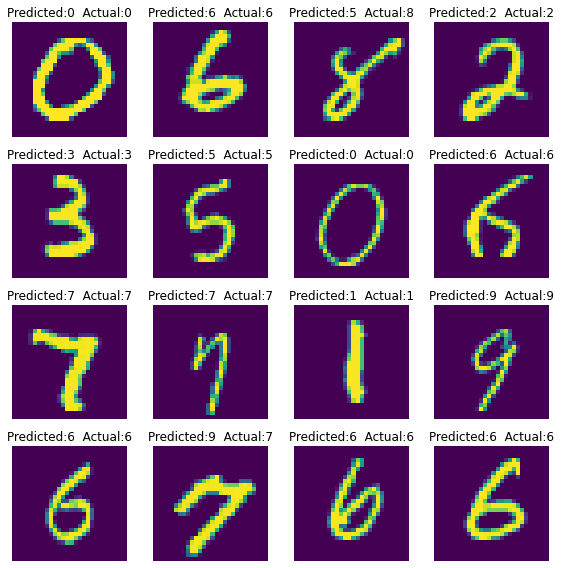

In [9]:
index=np.reshape(n_samples,(4,4))
fig,ax=plt.subplots(4,4,figsize=(8,8))
for i in range(0,index.shape[0]):
    for j in range(0,index.shape[1]):
        #the ij entry of this matrix is the random index of the image.
        k=index[i,j]
        
        #converting the 1D array of pixels into a 2D array of 28x28 image.
        b=X_test[k].reshape(28,28)
        
        #ploting the image.
        ax[i,j].imshow(b)
        title="Predicted:"+str(logreg.predict(X_test[k].reshape(1, -1))[0])+"  "+"Actual:"+str(y_test[k])
        ax[i,j].set_title(title)
        ax[i,j].set_axis_off()
        
#setting the separation between subplots.        
fig.tight_layout()

After a few repetitions of the creating and training model process, I could notice that there were some images that this model does not classifyes well; $9$ and $4$ were the usual errors in the clasification, along with some cases of $2$ and $1$.

Despite the errors, the Logstic Regression model worked well in the task of classification of these digits images.